<a href="https://colab.research.google.com/github/Parvez13/Kaggle-Dataset/blob/master/Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load Dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [3]:
# read dataset
df = pd.read_csv("tweets.csv")
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [4]:
# Shuffle the datast
df_shuffle = df.sample(frac=1, random_state=42)
df_shuffle

,id,keyword,location,text,target
3495,3495,demolished,Observation drone,How many illegal buildings should be demolishe...,0
5461,5461,fatality,NaN,Who’s fatality is this tho ????,0
9794,9794,sunk,London,#OnThisDay 2018 Chinese state media confirmed ...,1
11105,11105,windstorm,"London, UK",With any luck you will miss the windstorm on e...,0
1803,1803,buildings%20on%20fire,NaN,"Inferno on Black Friday 1939: 71 deaths, 3,700...",1
...,...,...,...,...,...
11284,11284,wreck,NaN,"After causing the wreck, they're like..... htt...",0
5191,5191,explosion,"Lagos, Nigeria",Let’s get the Starboy to 15k subscribers Befor...,0
5390,5390,fatalities,SE NC,Been a long day of storm surveys and one of ou...,0
860,860,blaze,"Kampala, Uganda","As we work on the next one, this was what lead...",0


0    9256
1    2114
Name: target, dtype: int64


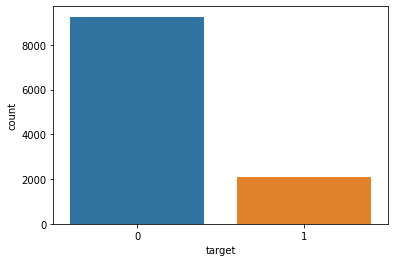

In [5]:
# Check whether  our dataset is balanced or imbalanced
print(df_shuffle['target'].value_counts())

import seaborn as sns
sns.countplot(x='target', data=df_shuffle);

**Our Dataset is Imabalanced**

In [9]:
# Import libraries, which are used to balance our dataset
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# # Features and Labels
features= df_shuffle.drop(['id', 'keyword', 'location', 'target'], axis=1)
labels = df_shuffle['target']

# Count the Number Labels 
print("----Imbalanced Dataset----")
print(Counter(labels))

# Define the oversampling
over_sampling = RandomOverSampler(sampling_strategy='minority')

# Fit the over_sampling to features and labels
features, labels = over_sampling.fit_resample(features, labels)

# Count the Number of labels
print("---Balanced Dataset------")
print(Counter(labels))

----Imbalanced Dataset----
Counter({0: 9256, 1: 2114})
---Balanced Dataset------
Counter({0: 9256, 1: 9256})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Split the Dataset into Training And Validation

In [12]:
# import train_test_split library
from sklearn.model_selection import train_test_split

# Initialize 
train_sentences,val_sentences, train_labels, val_labels = train_test_split(df_shuffle['text'].to_numpy(),
                                                                           df_shuffle['target'].to_numpy(),
                                                                           test_size=0.2,
                                                                           random_state=42)

# Checking the lengths 
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(9096, 2274, 9096, 2274)

In [13]:
train_sentences[:10], train_labels[:10]

(array(['This is exactly why women loathe being reviewed. What a way to really break down a womans body &amp; highlight our insecuritie…',
        'Fanyus waiting for the next #YuzuruHanyu sighting in this long, endless drought',
        "Prime Minister 's statement on the death of His Majesty Sultan Qaboos bin Said al Said, Sultan of Oman. h…",
        'Emergency meeting for her millionaire grandson. How regal. Hee-haw concern about the millions of families drowning under aus…',
        'Honouring the sacrifices of the protectors of our motherland, Modi govt has increased monetary assistance to Next of K…',
        'How to recognize real bmc approved parking contractor from.fake ones who collect money for parking on unobstructed roads…',
        'i honestly wish i was hot enough to be randomly given a writing fellowship/stipend while living in a penthouse in N… https://t.co/nctSN05trV',
        'Thier is an apparent derailment at #Hitchin this morning but or do not seem to know anythi

In [14]:
# Average no of tokens
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

17

### Convert Text Into Numbers

* Create `TextVectorization` layer
* Create `Embedding` layer

In [15]:
# Import TextVectorization
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 10000
max_length = 17

# Initialize it
text_vectorization = TextVectorization(max_tokens=max_tokens,
                                       output_mode='int',
                                       output_sequence_length=max_length)

In [16]:
# Adapt `train_sentences` to text_vectorization
%%time
text_vectorization.adapt(train_sentences)

CPU times: user 2.39 s, sys: 14.4 ms, total: 2.41 s
Wall time: 2.65 s


In [17]:
# Check the sample sentences
sample_sentences = "Love Me Like You Do! La La Love Me Like You Do. Touch Me Like Do!! More"
text_vectorization([sample_sentences])

<tf.Tensor: shape=(1, 17), dtype=int64, numpy=
array([[ 147,   39,   38,   12,   63, 3290, 3290,  147,   39,   38,   12,
          63, 1456,   39,   38,   63,   62]])>

In [18]:
# Check
import random
random_sentences = random.choice(train_sentences)
print(f"Original Sentences: \n{random_sentences}\n"
      "\nText vectorizer: ")
text_vectorization([random_sentences])

Original Sentences: 
Changes to our lives and our bodies as we get old can mean drinking increases or could cause harm without having made any ch…

Text vectorizer: 


<tf.Tensor: shape=(1, 17), dtype=int64, numpy=
array([[3482,    3,   56,  906,    7,   56, 1641,   27,   25,   66,  263,
          48,  406, 2905, 4056,   58,  128]])>

In [19]:
# Import Embeddings
from tensorflow.keras import layers

embeddings = layers.Embedding(input_dim=max_tokens,
                              output_dim=128,
                              embeddings_initializer='uniform',
                              input_length=max_length)
embeddings

In [20]:
# Check
random_sentences = random.choice(train_sentences)
print(f"Original sentences: \n{random_sentences}\n"
     "\nEmbedding: ")
embeddings(text_vectorization([random_sentences]))

Original sentences: 
Is it bad that I’ve watched it a dozen times &amp; I can’t definitively say if that’s a boy or girl? But al… https://t.co/vRdWnHju55

Embedding: 


<tf.Tensor: shape=(1, 17, 128), dtype=float32, numpy=
array([[[-0.00930713,  0.04316373,  0.02514463, ..., -0.04604704,
         -0.03619727,  0.03993678],
        [-0.00976915,  0.021355  ,  0.0339242 , ...,  0.04133016,
          0.03339913, -0.02191767],
        [ 0.02743581,  0.03776253,  0.03043314, ..., -0.04923495,
          0.03596358, -0.01385107],
        ...,
        [ 0.00169299, -0.0240082 ,  0.00714636, ..., -0.00028876,
          0.04796017, -0.0115922 ],
        [-0.02238435, -0.03040955,  0.01522825, ..., -0.00421857,
          0.04259619, -0.04743748],
        [ 0.04982703, -0.03452644, -0.01007296, ..., -0.04516785,
         -0.00494   , -0.02552888]]], dtype=float32)>

In [21]:
# Set helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves,  compare_historys

--2021-08-12 04:13:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-12 04:13:52 (69.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [28]:
words_in_vocab = text_vectorization.get_vocabulary()
len(words_in_vocab)

10000

## Build Model

In [26]:
# baseline model with LSTM
from tensorflow.keras import layers

# Pass the input shape
inputs = layers.Input(shape=(1,), dtype='string', name='input_layer')

# Convert our text into numbers
x = text_vectorization(inputs) 

# Vectorize the numbers
x = embeddings(x)

# Pass the ouputs
outputs = layers.Dense(1, activation='sigmoid', name='output_layer')(x)

# Build model
model_1 = tf.keras.Model(inputs,outputs, name="model_1")

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name="Logs",
                                                               experiment_name="model_1")])

Saving TensorBoard log files to: Logs/model_1/20210812-041705
Epoch 1/5
285/285 [==============================] - 8s 16ms/step - loss: 0.5039 - accuracy: 0.8110 - val_loss: 0.4596 - val_accuracy: 0.8160
Epoch 2/5
285/285 [==============================] - 4s 13ms/step - loss: 0.4252 - accuracy: 0.8357 - val_loss: 0.4522 - val_accuracy: 0.8167
Epoch 3/5
285/285 [==============================] - 4s 13ms/step - loss: 0.4094 - accuracy: 0.8364 - val_loss: 0.4549 - val_accuracy: 0.8165
Epoch 4/5
285/285 [==============================] - 4s 13ms/step - loss: 0.4036 - accuracy: 0.8364 - val_loss: 0.4554 - val_accuracy: 0.8158
Epoch 5/5
285/285 [==============================] - 4s 13ms/step - loss: 0.4005 - accuracy: 0.8362 - val_loss: 0.4586 - val_accuracy: 0.8151


In [29]:
# Evaluate our model
model_1.evaluate(val_sentences, val_labels)

72/72 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.8151


[0.45857831835746765, 0.8150965571403503]

In [33]:
# Make prediction_probabilities
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:2]

array([[[0.09094307],
        [0.0929566 ],
        [0.6877231 ],
        [0.42307425],
        [0.19891286],
        [0.05133724],
        [0.5834994 ],
        [0.45467997],
        [0.45723245],
        [0.09173094],
        [0.03764794],
        [0.13912293],
        [0.30294177],
        [0.2878128 ],
        [0.25300258],
        [0.18567787],
        [0.12508266]],

       [[0.18567787],
        [0.18567787],
        [0.05383417],
        [0.14066565],
        [0.24047661],
        [0.09173094],
        [0.33943796],
        [0.2778852 ],
        [0.04275393],
        [0.13126908],
        [0.03666497],
        [0.18567787],
        [0.0439235 ],
        [0.13912293],
        [0.18567787],
        [0.05383417],
        [0.14279887]]], dtype=float32)

In [34]:
# Make Predictions
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds

<tf.Tensor: shape=(2274, 17), dtype=float32, numpy=
array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [42]:
# Get the embed weights
embed_weights = model_1.get_layer('embedding').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [46]:
# # Create embeddings files
# import io

# out_v = io.open("vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("metadata.tsv", "w", encoding="utf-8")

# for word, index in enumerate(words_in_vocab):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = embed_weights[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()


In [51]:
# Calculate results using evaluation metrics
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# def calculate_results(y_true, y_pred):
#   """

#   Calculates model accuracy, precision, recall and f1 score of a binary classification model.
#   """

#   # Calculate model accuracy
#   model_accuracy = accuracy_score(y_true, y_pred) * 100
#   # Calculate model precision, recall and f1-score using 'weighted' average
#   model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
#   model_results = {"accuracy" : model_accuracy,
#                    "precison" : model_precision,
#                    "recall"  : model_recall,
#                    "f1" : model_f1}
#   return model_results

In [53]:
# calculate_results(val_labels, model_1_preds)

ValueError: ignored